In [1]:
import numpy as np 
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import functions as myfunc
import warnings
import os
import itertools
warnings.filterwarnings(action='ignore')

In [2]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/HANBatang.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)        

In [3]:
data = pd.read_csv("2019_statistical_data.csv" , encoding = "CP949")

In [4]:
data

,일련번호,가중치,소득분위층,성별,연령대,지역,업태,신고서소득세신고유형,기장의무구분,총수입합계금액,필요경비합계금액,종합소득금액,인적공제금액,소득공제합계액,과세표준금액,산출세액,세액공제,결정세액
0,1,315,3층,여성,34세 이하,비수도권,도·소매업,단순경비율,간편장부,18480000,15840000,2640000,1500000,2580000,70000,0,90000,0
1,2,315,3층,남성,55세~64세,수도권,도·소매업,단순경비율,간편장부,42630000,39170000,3450000,3000000,3390000,60000,0,240000,0
2,3,315,3층,여성,55세~64세,비수도권,도·소매업,단순경비율,간편장부,14610000,11470000,3140000,2000000,3080000,60000,0,90000,0
3,4,315,3층,여성,45세~54세,비수도권,도·소매업,단순경비율,간편장부,32460000,29520000,2940000,2000000,2880000,60000,0,90000,0
4,5,314,3층,여성,55세~64세,비수도권,음식·숙박업,단순경비율,간편장부,29310000,26670000,2640000,2000000,2560000,80000,0,90000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149266,149267,11,23층,여성,55세~64세,비수도권,기타,비사업자,비사업자,162800000,48290000,122400000,1500000,5667000,116700000,21760000,7863000,13900000
149267,149268,11,23층,남성,45세~54세,수도권,기타,비사업자,비사업자,155300000,30240000,125100000,4833000,15790000,109300000,23350000,2887000,20610000
149268,149269,11,23층,남성,55세~64세,수도권,부동산업,외부조정,복식부기,167500000,43660000,123800000,6167000,21190000,102600000,21040000,1500000,19530000
149269,149270,11,23층,남성,55세~64세,수도권,기타,NaN,복식부기,442900000,306600000,136300000,2000000,8913000,127300000,29900000,4577000,25320000


In [5]:
main_variable_ko = ["일련번호" , "가중치" , "소득분위층" , "성별","연령대","지역","업태","신고서소득세신고유형","기장의무구분","총수입합계금액","필요경비합계금액","종합소득금액","인적공제금액","소득공제합계액","과세표준금액","산출세액","세액공제","결정세액"]
main_variable_eng = ["id" , "weight" , "income_step" , "sex" , "age_c" , "region" , "job" , "call" , "survey" , "all_income" , "necessary_sum" , "jonghap_com" , "injuk" , "sodeuk" , "gwase" , "sanchul" , "seek" , "decision"]

In [6]:
data.columns = main_variable_eng

In [7]:
data

,id,weight,income_step,sex,age_c,region,job,call,survey,all_income,necessary_sum,jonghap_com,injuk,sodeuk,gwase,sanchul,seek,decision
0,1,315,3층,여성,34세 이하,비수도권,도·소매업,단순경비율,간편장부,18480000,15840000,2640000,1500000,2580000,70000,0,90000,0
1,2,315,3층,남성,55세~64세,수도권,도·소매업,단순경비율,간편장부,42630000,39170000,3450000,3000000,3390000,60000,0,240000,0
2,3,315,3층,여성,55세~64세,비수도권,도·소매업,단순경비율,간편장부,14610000,11470000,3140000,2000000,3080000,60000,0,90000,0
3,4,315,3층,여성,45세~54세,비수도권,도·소매업,단순경비율,간편장부,32460000,29520000,2940000,2000000,2880000,60000,0,90000,0
4,5,314,3층,여성,55세~64세,비수도권,음식·숙박업,단순경비율,간편장부,29310000,26670000,2640000,2000000,2560000,80000,0,90000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149266,149267,11,23층,여성,55세~64세,비수도권,기타,비사업자,비사업자,162800000,48290000,122400000,1500000,5667000,116700000,21760000,7863000,13900000
149267,149268,11,23층,남성,45세~54세,수도권,기타,비사업자,비사업자,155300000,30240000,125100000,4833000,15790000,109300000,23350000,2887000,20610000
149268,149269,11,23층,남성,55세~64세,수도권,부동산업,외부조정,복식부기,167500000,43660000,123800000,6167000,21190000,102600000,21040000,1500000,19530000
149269,149270,11,23층,남성,55세~64세,수도권,기타,NaN,복식부기,442900000,306600000,136300000,2000000,8913000,127300000,29900000,4577000,25320000


## Conditioning 과정

In [8]:
cond1 = [data["seek"] == 0 , data["seek"] > 0]
cond2 = [data["sanchul"] == 0 , data["sanchul"] > 0]
cond3 = [data["decision"] == 0 , data["decision"] > 0]

data_list = []

for i in range(len(cond1)) : 
    for j in range(len(cond2)) : 
        for k in range(len(cond3)) : 
            a = data[cond1[i] & cond2[j] & cond3[k]]
            data_list.append(a)


In [9]:
[len(data_list[i]) for i in range(0,8)]

[1137, 0, 0, 885, 1559, 0, 8652, 137038]

## Transform과정

In [10]:
from rdt import HyperTransformer
from rdt.transformers.numerical import GaussianNormalizer
from rdt.transformers.categorical import LabelEncoder
from rdt.transformers.numerical import FloatFormatter
from rdt.transformers.categorical import FrequencyEncoder

In [11]:
ht = HyperTransformer()

In [12]:
ht.detect_initial_config(data=data)

In [13]:
ht.get_config()

{
    "sdtypes": {
        "id": "numerical",
        "weight": "numerical",
        "income_step": "categorical",
        "sex": "categorical",
        "age_c": "categorical",
        "region": "categorical",
        "job": "categorical",
        "call": "categorical",
        "survey": "categorical",
        "all_income": "numerical",
        "necessary_sum": "numerical",
        "jonghap_com": "numerical",
        "injuk": "numerical",
        "sodeuk": "numerical",
        "gwase": "numerical",
        "sanchul": "numerical",
        "seek": "numerical",
        "decision": "numerical"
    },
    "transformers": {
        "id": FloatFormatter(),
        "weight": FloatFormatter(),
        "income_step": FrequencyEncoder(),
        "sex": FrequencyEncoder(),
        "age_c": FrequencyEncoder(),
        "region": FrequencyEncoder(),
        "job": FrequencyEncoder(),
        "call": FrequencyEncoder(),
        "survey": FrequencyEncoder(),
        "all_income": FloatFormatter(),
    

In [14]:
ht.set_config(config = {
    "sdtypes": {
        "id": "numerical",
        "weight": "numerical",
        "income_step": "categorical",
        "sex": "categorical",
        "age_c": "categorical",
        "region": "categorical",
        "job": "categorical",
        "call": "categorical",
        "survey": "categorical",
        "all_income": "numerical",
        "necessary_sum": "numerical",
        "jonghap_com": "numerical",
        "injuk": "numerical",
        "sodeuk": "numerical",
        "gwase": "numerical",
        "sanchul": "numerical",
        "seek": "numerical",
        "decision": "numerical"
    },
    "transformers": {
        "id": FloatFormatter(),
        "weight": FloatFormatter(),
        "income_step": FrequencyEncoder(),
        "sex": FrequencyEncoder(),
        "age_c": FrequencyEncoder(),
        "region": FrequencyEncoder(),
        "job": FrequencyEncoder(),
        "call": FrequencyEncoder(),
        "survey": FrequencyEncoder(),
        "all_income": GaussianNormalizer(),
        "necessary_sum": GaussianNormalizer(),
        "jonghap_com": GaussianNormalizer(),
        "injuk": GaussianNormalizer(),
        "sodeuk": GaussianNormalizer(),
        "gwase": GaussianNormalizer(),
        "sanchul": GaussianNormalizer(),
        "seek": GaussianNormalizer(),
        "decision": GaussianNormalizer()
    }
})

In [15]:
ht.get_config()

{
    "sdtypes": {
        "id": "numerical",
        "weight": "numerical",
        "income_step": "categorical",
        "sex": "categorical",
        "age_c": "categorical",
        "region": "categorical",
        "job": "categorical",
        "call": "categorical",
        "survey": "categorical",
        "all_income": "numerical",
        "necessary_sum": "numerical",
        "jonghap_com": "numerical",
        "injuk": "numerical",
        "sodeuk": "numerical",
        "gwase": "numerical",
        "sanchul": "numerical",
        "seek": "numerical",
        "decision": "numerical"
    },
    "transformers": {
        "id": FloatFormatter(),
        "weight": FloatFormatter(),
        "income_step": FrequencyEncoder(),
        "sex": FrequencyEncoder(),
        "age_c": FrequencyEncoder(),
        "region": FrequencyEncoder(),
        "job": FrequencyEncoder(),
        "call": FrequencyEncoder(),
        "survey": FrequencyEncoder(),
        "all_income": GaussianNormalizer(),


In [182]:
list_df = []

for i in range(0,8):
    if len(data_list[i]) == 0 :
        list_df.append(data_list[i])
    else : 
        ht.fit(data_list[i])
        list_df.append(ht.fit_transform(data_list[i]))

In [183]:
[len(list_df[i]) for i in range(0,8)]

[1137, 0, 0, 885, 1559, 0, 8652, 137038]

In [184]:
transformed_data_names = ["2019_transformed_data" + str(i) + ".csv" for i in range(0,8)] 

for i in range(0,8):
    list_df[i].to_csv(transformed_data_names[i] , index = False)

## CTGAN 과정

In [10]:
from sdv.tabular import CTGAN

In [11]:
transformed_data = []

for i in range(0, 8):
    file_name = "2019_transformed_data" + str(i) + ".csv"
    df = pd.read_csv(file_name)
    transformed_data.append(df)


In [12]:
[len(transformed_data[i]) for i in range(0,8)]

[1137, 0, 0, 885, 1559, 0, 8652, 137038]

In [13]:
ctgan_list_df = []
for i in range(0, 8):
    ctgan_list_df.append("")

In [14]:
model1 = CTGAN(epochs = 100 , batch_size = 100 , verbose = True) # 100 ~ 1000개 
model2 = CTGAN(epochs = 100 , batch_size = 300 , verbose = True) # 1000 ~ 3000개 
model3 = CTGAN(epochs = 100 , batch_size = 500, verbose = True)  # 3000 ~ 10000개 
model4 = CTGAN(epochs = 100 , batch_size = 1000 , verbose = True) # 10000개 이상

In [15]:
for i in range(0,8):

    if len(transformed_data[i]) < 10 :   
        ctgan_list_df[i] = transformed_data[i]

    elif 100 < len(transformed_data[i]) < 1000 :   
        model1.fit(transformed_data[i])
        ctgan_list_df[i] = model1.sample(len(transformed_data[i]))
        
    elif 1000 <= len(transformed_data[i]) < 3000 :   
        model2.fit(transformed_data[i])
        ctgan_list_df[i] = model2.sample(len(transformed_data[i]))
    
    elif 3000 <= len(transformed_data[i]) < 10000 : 
        model3.fit(transformed_data[i])
        ctgan_list_df[i] = model3.sample(len(transformed_data[i]))

    elif 10000 <= len(transformed_data[i]) :  
        model4.fit(transformed_data[i])
        ctgan_list_df[i] = model4.sample(len(transformed_data[i]))    

Epoch 1, Loss G:  0.0360,Loss D: -0.0148
Epoch 2, Loss G:  0.0207,Loss D: -0.0364
Epoch 3, Loss G: -0.0052,Loss D: -0.1139
Epoch 4, Loss G: -0.1688,Loss D: -0.1571
Epoch 5, Loss G: -0.2862,Loss D: -0.0829
Epoch 6, Loss G: -0.5017,Loss D: -0.0642
Epoch 7, Loss G: -0.6221,Loss D: -0.0561
Epoch 8, Loss G: -0.9240,Loss D: -0.0608
Epoch 9, Loss G: -0.8964,Loss D: -0.0041
Epoch 10, Loss G: -1.0309,Loss D: -0.1544
Epoch 11, Loss G: -1.0912,Loss D: -0.2839
Epoch 12, Loss G: -0.8310,Loss D: -0.1438
Epoch 13, Loss G: -0.9711,Loss D: -0.2340
Epoch 14, Loss G: -0.9940,Loss D:  0.0749
Epoch 15, Loss G: -1.2511,Loss D:  0.3586
Epoch 16, Loss G: -1.1071,Loss D:  0.1365
Epoch 17, Loss G: -1.1226,Loss D:  0.4784
Epoch 18, Loss G: -1.0894,Loss D:  0.2635
Epoch 19, Loss G: -1.0942,Loss D:  0.3753
Epoch 20, Loss G: -0.9274,Loss D:  0.2446
Epoch 21, Loss G: -0.9329,Loss D:  0.1527
Epoch 22, Loss G: -0.7296,Loss D:  0.0420
Epoch 23, Loss G: -0.7288,Loss D:  0.0494
Epoch 24, Loss G: -0.5271,Loss D: -0.1589
E

In [16]:
[len(ctgan_list_df[i]) for i in range(0,8)]

[1137, 0, 0, 885, 1559, 0, 8652, 137038]

In [17]:
ctgan_list_df[0]

,id,weight,income_step,sex,age_c,region,job,call,survey,all_income,necessary_sum,jonghap_com,injuk,sodeuk,gwase,sanchul,seek,decision
0,2642.0,235.0,0.410282,0.737175,0.128848,0.276605,0.634751,0.755433,0.447230,1.348995,-1.130930,-0.485750,-5.166578,5.166578,5.166578,5.166578,5.166578,5.166578
1,2760.0,173.0,0.390941,0.808539,0.147902,0.276605,0.847185,0.295407,0.447230,-1.570965,-1.437735,2.402716,-5.128452,-0.287857,5.166578,5.166578,5.166578,5.166578
2,2543.0,192.0,0.393438,0.728763,0.128848,0.276605,0.232929,0.996482,0.447230,-3.551187,0.746623,-5.003130,-5.068582,-4.786498,5.166578,5.166578,5.166578,5.166578
3,2716.0,131.0,0.390977,0.299130,0.128848,0.763975,0.436943,0.926582,0.447230,-1.336006,-1.342382,1.711380,-5.166578,-4.799342,5.166578,5.166578,5.166578,5.166578
4,1142.0,112.0,0.413003,0.755847,0.723832,0.776605,0.449016,0.693695,0.447230,-2.501073,-1.305916,-5.131925,-5.166578,1.670815,5.166578,5.166578,5.166578,5.166578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,1797.0,120.0,0.390941,0.765565,0.780206,0.276605,0.999560,0.313318,0.451696,-0.053163,-1.506984,-5.034498,-5.166578,2.488871,5.166578,5.166578,5.166578,5.166578
1133,2632.0,171.0,0.397198,0.736449,0.602908,0.772316,0.184184,0.309134,0.447230,-0.102480,-2.531206,-0.000307,-5.166578,0.914434,5.166578,5.166578,5.166578,5.166578
1134,2760.0,121.0,0.390941,0.759749,0.695323,0.276605,0.191716,0.315412,0.447230,-1.365832,1.398398,-5.039391,-5.166578,-5.157816,5.166578,5.166578,5.166578,5.166578
1135,2468.0,134.0,0.405892,0.307454,0.590695,0.276605,0.462129,0.279244,0.447230,-1.499935,-0.723564,-1.468504,-5.094484,0.761215,5.166578,5.166578,5.166578,5.166578


In [18]:
syn_file_names = ["2019_syn_data_scenario" + str(i) + ".csv" for i in range(0, 8)]
for j in range(0, 8):
        ctgan_list_df[j].to_csv(syn_file_names[j], index = False)

In [19]:
synthetic_data = pd.concat([ctgan_list_df[i] for i in range(0, 8)] , axis = 0) 

synthetic_data.to_csv("2019_statistic_syn_data.csv" , index = False)

In [20]:
len(synthetic_data)

149271

## Retransform 과정

In [16]:
transformed_data = []

for i in range(0, 8):
    file_name = "2019_syn_data_scenario" + str(i) + ".csv"
    df = pd.read_csv(file_name)
    transformed_data.append(df)


In [17]:
len(transformed_data)

8

In [18]:
[len(transformed_data[i]) for i in range(0,8)]

[1137, 0, 0, 885, 1559, 0, 8652, 137038]

In [30]:
list_df = []

for i in range(0,8):
    if len(data_list[i]) == 0 :
        list_df.append(data_list[i])
    else : 
        ht.fit(data_list[i])
        list_df.append(ht.fit_transform(data_list[i]))

In [19]:
final_transform_data = []

for i in range(0, 8):
    if len(transformed_data[i]) == 0 : 
        final_transform_data.append(transformed_data[i])
    else :
        ht.fit(data_list[i])
        final_transform_data.append(ht.reverse_transform(transformed_data[i]))

In [20]:
len(final_transform_data)

8

In [21]:
[len(final_transform_data[i]) for i in range(0,8)]

[1137, 0, 0, 885, 1559, 0, 8652, 137038]

In [22]:
final_synthetic_data = pd.concat([final_transform_data[i] for i in range(0,8)])

In [23]:
final_synthetic_data.to_csv("2019_retransform_data.csv" , index = False)

In [24]:
data.head(5)

,id,weight,income_step,sex,age_c,region,job,call,survey,all_income,necessary_sum,jonghap_com,injuk,sodeuk,gwase,sanchul,seek,decision
0,1,315,3층,여성,34세 이하,비수도권,도·소매업,단순경비율,간편장부,18480000,15840000,2640000,1500000,2580000,70000,0,90000,0
1,2,315,3층,남성,55세~64세,수도권,도·소매업,단순경비율,간편장부,42630000,39170000,3450000,3000000,3390000,60000,0,240000,0
2,3,315,3층,여성,55세~64세,비수도권,도·소매업,단순경비율,간편장부,14610000,11470000,3140000,2000000,3080000,60000,0,90000,0
3,4,315,3층,여성,45세~54세,비수도권,도·소매업,단순경비율,간편장부,32460000,29520000,2940000,2000000,2880000,60000,0,90000,0
4,5,314,3층,여성,55세~64세,비수도권,음식·숙박업,단순경비율,간편장부,29310000,26670000,2640000,2000000,2560000,80000,0,90000,0


In [25]:
final_synthetic_data.head(5)

,id,weight,income_step,sex,age_c,region,job,call,survey,all_income,necessary_sum,jonghap_com,injuk,sodeuk,gwase,sanchul,seek,decision
0,2642,235,1층,여성,45세~54세,수도권,음식·숙박업,외부조정,복식부기,377208936,48556450,1390776,1500000,15398982,0,0,0,0
1,2760,173,1층,여성,45세~54세,수도권,제조업,간편장부,복식부기,21008784,28905414,7431875,1500000,3228811,0,0,0,0
2,2543,192,1층,여성,45세~54세,수도권,기타,NaN,복식부기,81346,299377813,1,1500001,1500004,0,0,0,0
3,2716,131,1층,남성,45세~54세,비수도권,도·소매업,기준경비율,복식부기,32365980,34262725,5833131,1500000,1500004,0,0,0,0
4,1142,112,1층,여성,35세~44세,비수도권,도·소매업,외부조정,복식부기,2305966,36486909,1,1500000,7236639,0,0,0,0


In [ ]:
seek , decision ,sanchul

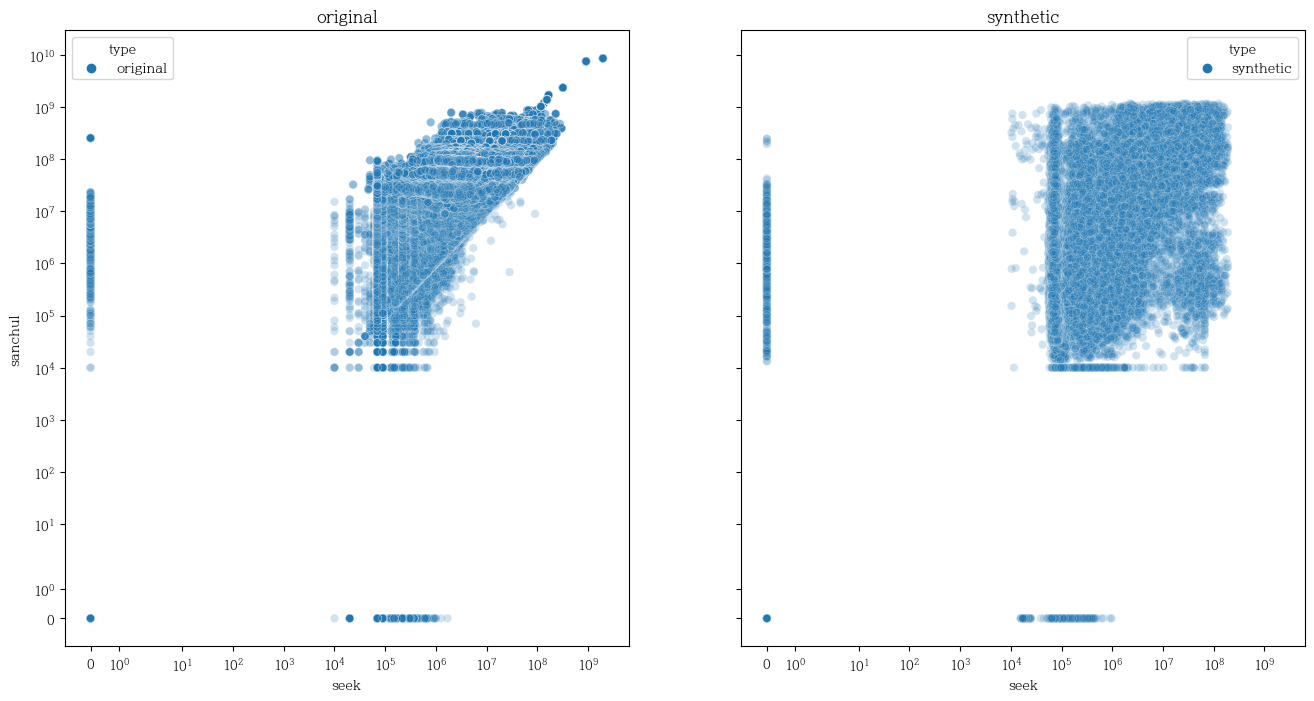

In [26]:
a = data.copy()
b = final_synthetic_data.copy()
a['type'] = 'original'
b['type'] = 'synthetic'
comb_data  = pd.concat([a, b], ignore_index=True, axis=0)

train_vars = ["seek" , "sanchul" , "decision"]

myfunc.scatter_by_group_sns_side_symlog(comb_data, train_vars[0],train_vars[1],  'type', ['original','synthetic'], train_vars[0],train_vars[1], 'Scenario1_1.png')

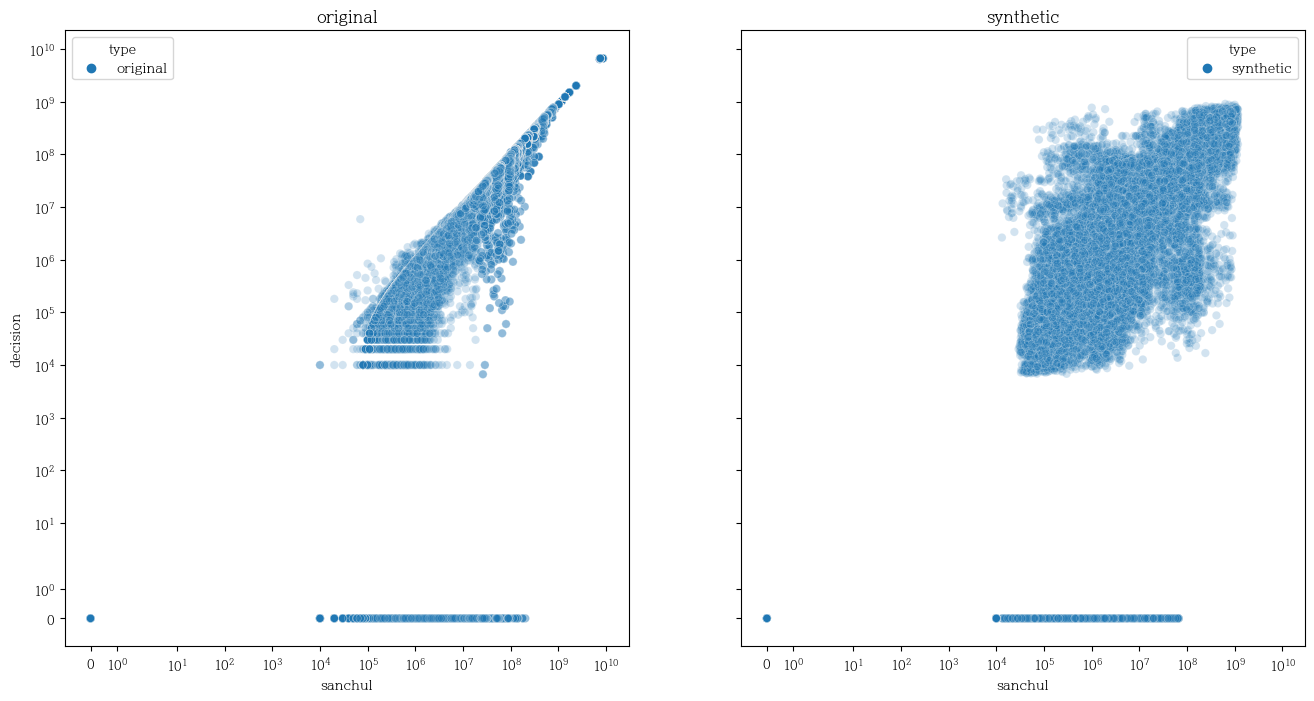

In [29]:
a = data.copy()
b = final_synthetic_data.copy()
a['type'] = 'original'
b['type'] = 'synthetic'
comb_data  = pd.concat([a, b], ignore_index=True, axis=0)

train_vars = ["seek" , "sanchul" , "decision"]

myfunc.scatter_by_group_sns_side_symlog(comb_data, train_vars[1],train_vars[2],  'type', ['original','synthetic'], train_vars[1],train_vars[2], 'Scenario1_1.png')

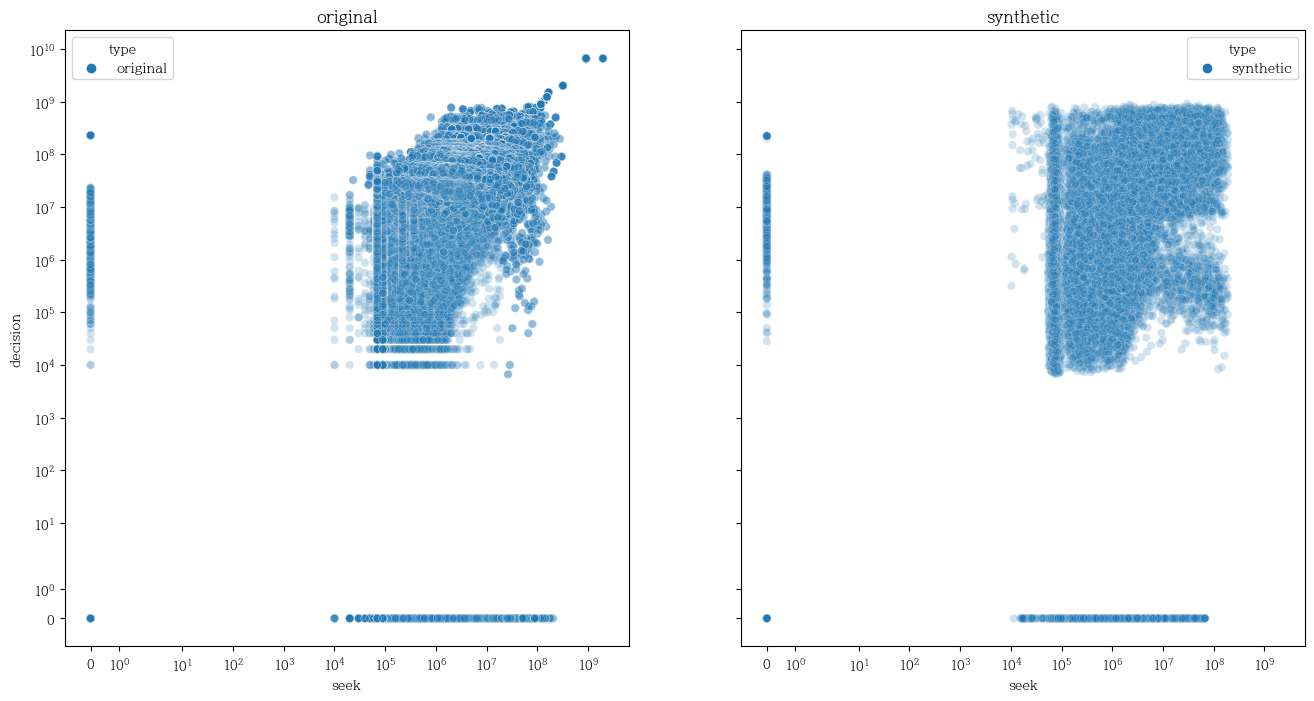

In [28]:
a = data.copy()
b = final_synthetic_data.copy()
a['type'] = 'original'
b['type'] = 'synthetic'
comb_data  = pd.concat([a, b], ignore_index=True, axis=0)

train_vars = ["seek" , "sanchul" , "decision"]

myfunc.scatter_by_group_sns_side_symlog(comb_data, train_vars[0],train_vars[2],  'type', ['original','synthetic'], train_vars[0],train_vars[2], 'Scenario1_1.png')